<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://www.dupageforest.org/hubfs/DuPage2022/Places%20to%20Go/Centers/Willowbrook%20Wildlife%20Center/Living%20With/opossum.jpg
)

In [94]:
#@title Импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
#@title Загрузка датасета Possum

import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum", path='possum.csv')

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/abrambeyer/openintro-possum/versions/1/possum.csv


In [122]:
df = pd.read_csv(path)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [124]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.2+ KB


In [125]:
df = df.drop('case', axis=1)

In [126]:
from matplotlib.colors import LinearSegmentedColormap

possum_cmap = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#4E4E4E-A9A9A9-FFFFFF-FFB2BB-FF8090
    (0.000, (0.306, 0.306, 0.306)),
    (0.250, (0.663, 0.663, 0.663)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.750, (1.000, 0.698, 0.733)),
    (1.000, (1.000, 0.502, 0.565))))

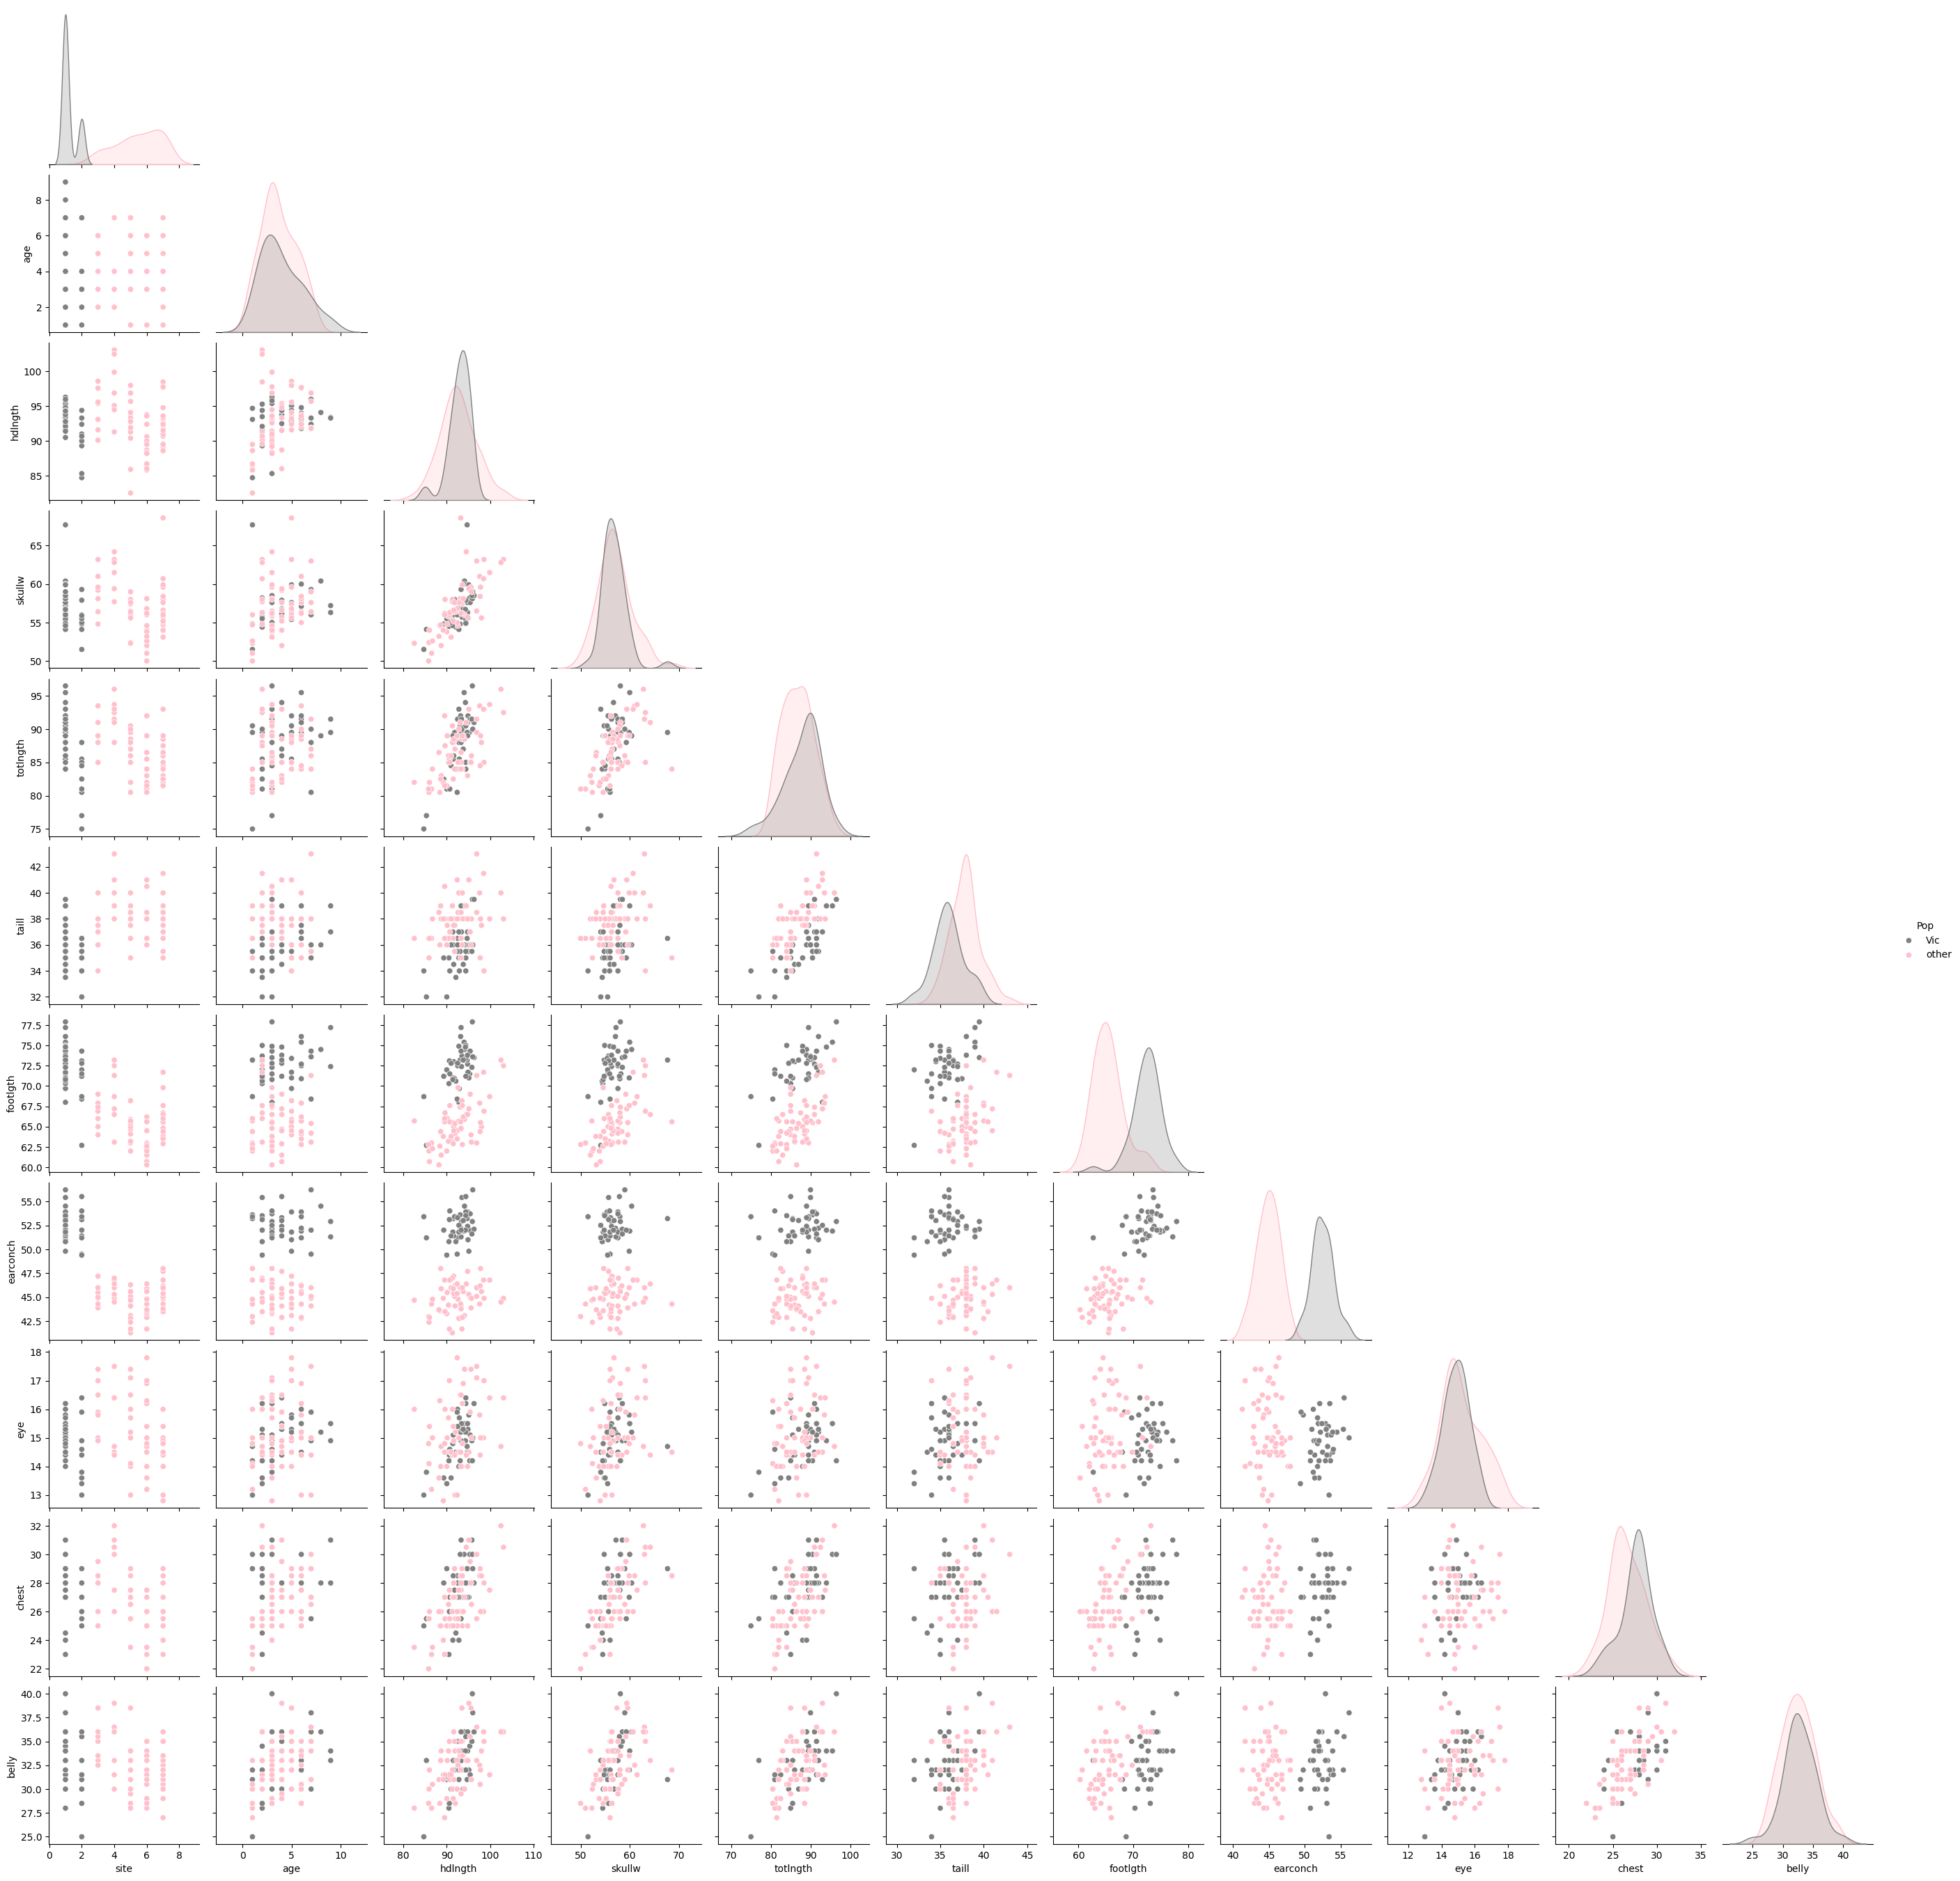

In [101]:
sns.pairplot(df, hue='Pop', palette=['gray', 'pink'], corner=True, diag_kind='kde')

In [127]:
df_num = df.drop(['Pop', 'sex', 'taill'], axis=1)
df_cat = df[['Pop', 'sex']]
target = df[['taill']]
df_num.head()

,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly
0,1,8.0,94.1,60.4,89.0,74.5,54.5,15.2,28.0,36.0
1,1,6.0,92.5,57.6,91.5,72.5,51.2,16.0,28.5,33.0
2,1,6.0,94.0,60.0,95.5,75.4,51.9,15.5,30.0,34.0
3,1,6.0,93.2,57.1,92.0,76.1,52.2,15.2,28.0,34.0
4,1,2.0,91.5,56.3,85.5,71.0,53.2,15.1,28.5,33.0


In [128]:
#@title Исследование корреляций

# Построение корреляционной матрицы
corr_matrix = df.drop(['Pop', 'sex'], axis=1).corr()
print("\nКорреляционная матрица:")
print(corr_matrix)


Корреляционная матрица:
              site       age   hdlngth    skullw  totlngth     taill  \
site      1.000000 -0.127688 -0.195820 -0.103363 -0.304642  0.372065   
age      -0.127688  1.000000  0.329505  0.285563  0.268297  0.120205   
hdlngth  -0.195820  0.329505  1.000000  0.705901  0.670402  0.275155   
skullw   -0.103363  0.285563  0.705901  1.000000  0.506382  0.241027   
totlngth -0.304642  0.268297  0.670402  0.506382  1.000000  0.563586   
taill     0.372065  0.120205  0.275155  0.241027  0.563586  1.000000   
footlgth -0.781489  0.126190  0.415945  0.297197  0.483174 -0.114560   
earconch -0.818580  0.066234  0.131576  0.025293  0.181230 -0.387871   
eye      -0.040443  0.231857  0.354688  0.314319  0.247150  0.192341   
chest    -0.380269  0.335030  0.621068  0.613842  0.556094  0.152924   
belly    -0.195044  0.360816  0.545438  0.444216  0.500558  0.296206   

          footlgth  earconch       eye     chest     belly  
site     -0.781489 -0.818580 -0.040443 -0.380269 

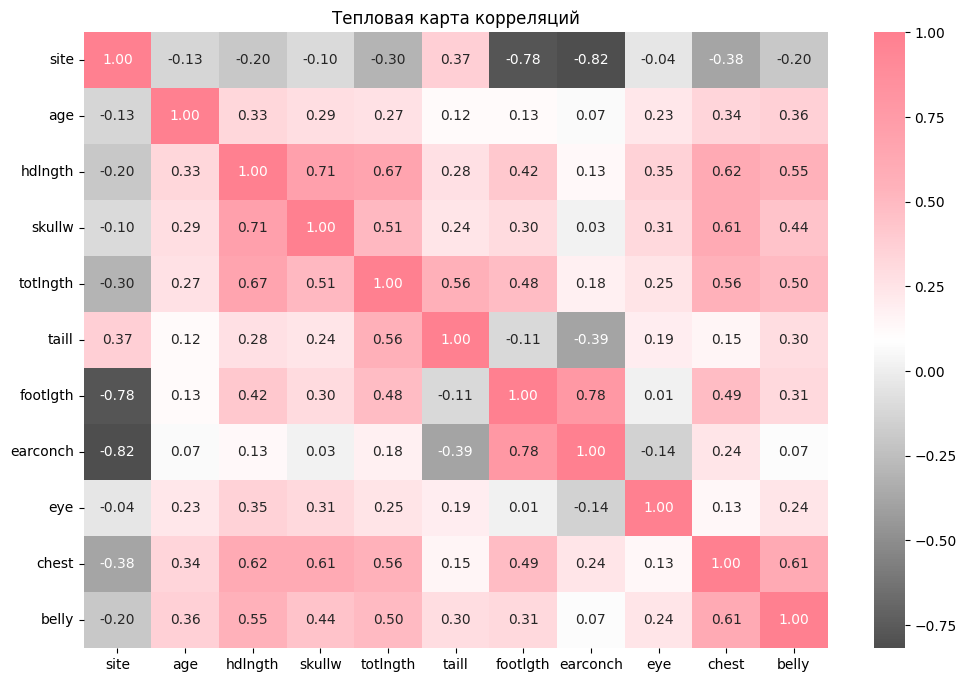

In [129]:
# Визуализация тепловой карты корреляций

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=possum_cmap, fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [130]:
def corr_filter(x: pd.DataFrame, bound: float):
    x_corr = x.corr()
    x_filtered = x_corr[((x_corr >= bound) | (x_corr <= -bound)) & (x_corr !=1.000)]
    x_flattened = x_filtered.unstack().sort_values().drop_duplicates()
    return x_flattened

corr_filter(df_num, .75)

site      earconch   -0.818580
          footlgth   -0.781489
footlgth  earconch    0.782415
site      site             NaN
dtype: float64

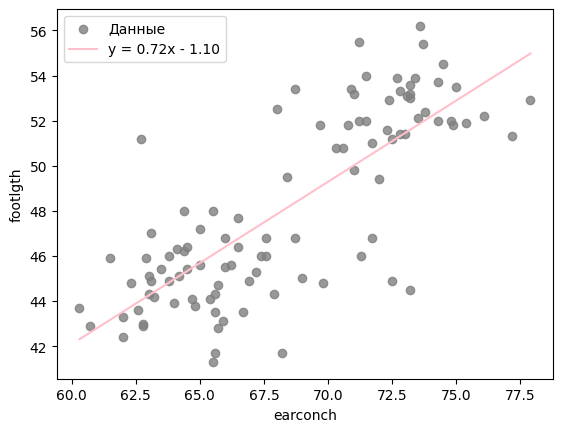

In [131]:
#sns.scatterplot(df, x='footlgth', y='earconch', hue='site')

x = np.array(df['footlgth'])
y = np.array(df['earconch'])

a, b, _, _, _ = stats.linregress(x, y)
reg_x = np.linspace(x.min(), x.max(), 100)
reg_y = a * reg_x + b

plt.scatter(x, y, c='grey', label="Данные", alpha=0.8)
plt.plot(reg_x, reg_y, color='pink', label=f"y = {a:.2f}x - {abs(b):.2f}")
plt.xlabel("earconch")
plt.ylabel("footlgth")
plt.legend()
plt.show()

In [132]:
#@title Подготовка данных к линейной регрессии

scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)

X = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
y = target
X.head()

,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
0,-1.135075,2.192511,0.391091,1.114121,0.414441,1.389467,1.575748,0.141928,0.465334,1.238441,False,True
1,-1.135075,1.143015,-0.065889,0.207174,1.013103,0.934052,0.758956,0.901381,0.714004,0.133146,False,False
2,-1.135075,1.143015,0.362530,0.984557,1.970964,1.594404,0.932215,0.426723,1.460016,0.501578,False,False
3,-1.135075,1.143015,0.134040,0.045219,1.132836,1.753799,1.006469,0.141928,0.465334,0.501578,False,False
4,-1.135075,-0.955976,-0.351501,-0.213909,-0.423687,0.592490,1.253981,0.046996,0.714004,0.133146,False,False


In [133]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site       101 non-null    float64
 1   age        101 non-null    float64
 2   hdlngth    101 non-null    float64
 3   skullw     101 non-null    float64
 4   totlngth   101 non-null    float64
 5   footlgth   101 non-null    float64
 6   earconch   101 non-null    float64
 7   eye        101 non-null    float64
 8   chest      101 non-null    float64
 9   belly      101 non-null    float64
 10  Pop_other  101 non-null    bool   
 11  sex_m      101 non-null    bool   
dtypes: bool(2), float64(10)
memory usage: 8.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   taill   101 non-null    float64
dtypes: float64(1)
memory usage: 936.0 bytes


In [135]:
# Разделение данных на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")


Размеры выборок:
Обучающая выборка: (80, 12), Тестовая выборка: (21, 12)


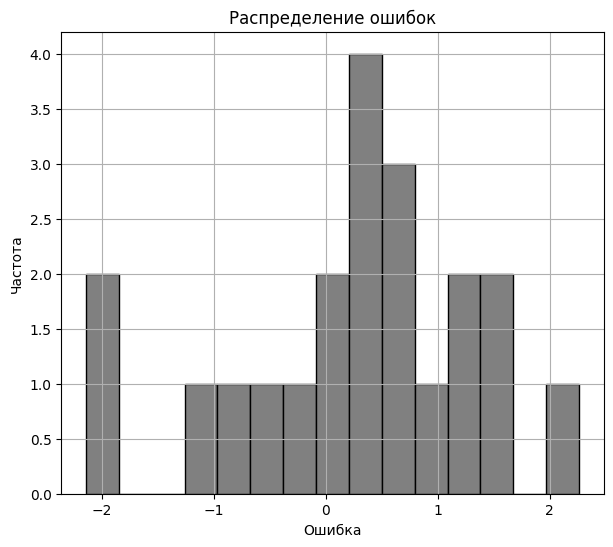

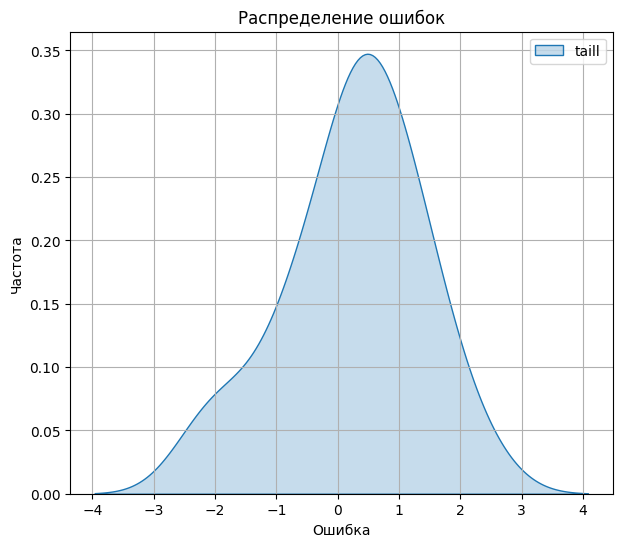

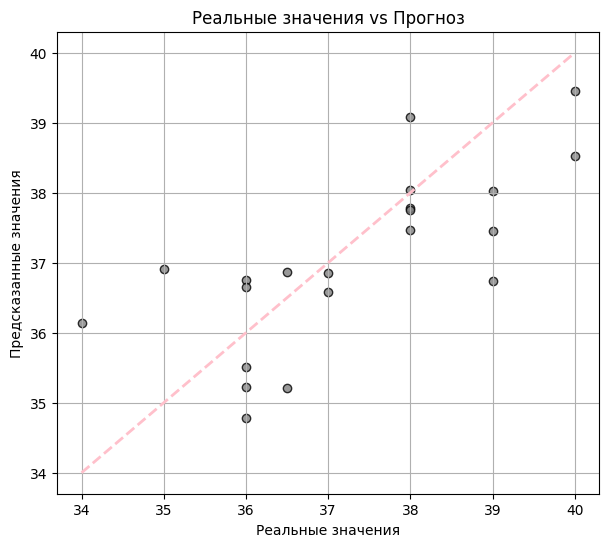

In [156]:
# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# Расчет ошибок
errors = y_test - y_pred

# График распределения ошибок
plt.figure(figsize=(7, 6))
plt.hist(errors, bins=15, color='grey', edgecolor='black')
plt.title("Распределение ошибок")
plt.xlabel("Ошибка")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 6))
sns.kdeplot(errors, color='black', fill=True)
plt.title("Распределение ошибок")
plt.xlabel("Ошибка")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

# График реальных значений против предсказанных (оценка выбросов)
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.8, color='gray', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='pink', linestyle='--', lw=2)
plt.title("Реальные значения vs Прогноз")
plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.grid(True)
plt.show()

In [157]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Метрики модели:\nMSE: {mse:.4f};\nR2: {r2:.4f}.\n")

Метрики модели:
MSE: 1.2407;
R2: 0.4969.

